In [29]:
import numpy as np

In [30]:
class LogisticRegression(object):
    def __init__(self, n_iter= 1000, lr= 0.001):
        self.lr= lr
        self.wwights= None
        self.n_iter= n_iter
        self.bias= None

    def _sigmoid(self, z):
        return 1/ (1+ np.exp(-z))

    def fit(self, X, y):
        n_sample, n_features= X.shape
        self.weights= np.random.rand(n_features) #Initializing the weights and bias
        self.bias= 0

        for _ in range(self.n_iter):
            g_x= np.dot(X, self.weights)+ self.bias #Predict the value using sigmoid
            y_predicted= self._sigmoid(g_x)

            #Updating the weights and biases using gradient descent
            self.weights-= -(self.lr/ n_sample)*np.sum(y*np.log(y_predicted)+ (1- y)*np.log(1- y_predicted))
            self.bias-= (self.lr/ n_sample)*np.sum(y_predicted- y)

    def predict(self, X):
        g_x= np.dot(X, self.weights)+ self.bias
        self.y_predicted= self._sigmoid(g_x)
        self.y_predicted_classes= [1 if i> 0.5 else 0 for i in self.y_predicted]
        return self.y_predicted_classes

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [32]:
breast_cancer= datasets.load_breast_cancer()
X, y= breast_cancer.data, breast_cancer.target

In [33]:
print('Shape of X:', X.shape)

Shape of X: (569, 30)


In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

X_train_zeros= X_train[y_train== 0]
X_train_ones= X_train[y_train== 1]


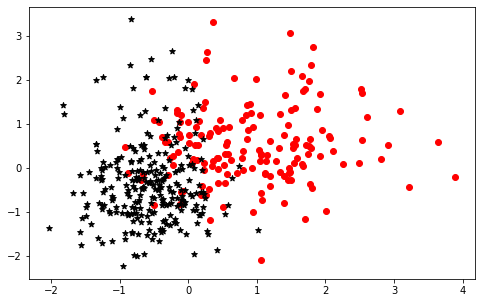

In [35]:
figure=  plt.figure(figsize= (8, 5))
plt.scatter(X_train_zeros[:, 0], X_train_zeros[:, 1], marker= 'o', color= 'r')
plt.scatter(X_train_ones[:, 0], X_train_ones[:, 1], marker= '*', color= 'k')

In [36]:
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)
train_predict= log_reg.predict(X_train)
test_predict= log_reg.predict(X_test)

In [39]:
def accuracy(y_true, y_predicted):
    accuracy= np.sum(y_true== y_predicted)/ len(y_true)
    return accuracy

In [42]:
train_accuracy= accuracy(y_train, train_predict)
print('train  accuarcy is:', train_accuracy)

train  accuarcy is: 0.8732394366197183
